# General Notebook for ZAS

In [4]:
import time
print(9.6e-6/300000)

Data = 2e12 # in bytes
Speed = 2e6 # in Mbps
sec = (Data*8)/Speed
minutes = 0
days = 0
hours = 0
print('The number of minutes is {0:.2f}'.format(sec)) 
print(time)
if sec <= 60:
  minutes = sec // 60
  print('The number of minutes is {0:.2f}'.format(minutes)) 
if sec <= 3600:
  hours = sec // 3600
  print('The number of minutes is {0:.2f}'.format(hours))
if sec <= 86400:
  days = sec // 86400
  print('The number of minutes is {0:.2f}'.format(days))
print("Days:Hours:Min:Sec = {}:{}:{}:{}".format(days, hours, minutes, sec))

3.2e-11
The number of minutes is 8000000.00
<module 'time' (built-in)>
Days:Hours:Min:Sec = 0:0:0:8000000.0


In [5]:
#!/usr/bin/env python

""" Floyd-Steinberg Dithering algorithm, see:
    http://en.wikipedia.org/wiki/Floyd-Steinberg
"""

import sys
import os

from math import sqrt
#from Numeric import *
import numpy as np

fs_coeffs = [7.0,3.0,5.0,1.0]

class Dither:

    def __init__(self,pixels,xl,yl):

        self.pixels = pixels
        self.xl = xl
        self.yl = yl

        self.fs_dither()

    def _find_closest_palette_color(self, oldpixel): 
        return int(oldpixel + 0.5)

    def fs_dither(self):

        A,B,G,S = map(lambda x : float(x)/16.0, fs_coeffs)

        for y in range(self.yl):
            for x in range(self.xl):
                oldpixel = self.pixels[x][y]
                newpixel = self._find_closest_palette_color(oldpixel)
                self.pixels[x][y] = float(newpixel)
                quant_error = float(oldpixel - newpixel)
                if (x < self.xl - 1):
                    self.pixels[x+1][y] += (A * quant_error)
                if (x > 0) and (y < self.yl - 1):
                    self.pixels[x-1][y+1] += (B * quant_error)
                if (y < self.yl - 1):
                    self.pixels[x][y+1] += (G * quant_error)
                if (x < self.xl - 1) and (y < self.yl - 1):
                    self.pixels[x+1][y+1] += (S * quant_error)


if __name__=='__main__':

    """ Form an xl-by-yl array """
    xl = yl = 20
    initpixels = np.reshape((0.5,) * xl * yl ,[xl,yl])

    """ Dither """
    D = Dither(initpixels,xl,yl)
    print(D.pixels)

    """ Import the R stats package libraries
        and create a matrix of the dither pixels
    """
    import rpy as R
    z_lst = []
    [z_lst.extend(i) for i in D.pixels]
    z = R.r.matrix(z_lst, byrow=R.r.FALSE, ncol=xl)
            
    """ Create a plot of the dithered image """
    R.r.pdf("dither_plot.pdf")
    R.r.image(range(xl),range(yl),z)
    R.r.dev_off()

[[ 1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.
   1.  0.]
 [ 0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.
   0.  1.]
 [ 1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.
   1.  0.]
 [ 0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.
   0.  1.]
 [ 1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.
   1.  0.]
 [ 0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.
   0.  1.]
 [ 1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.
   1.  0.]
 [ 0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.
   0.  1.]
 [ 1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.
   1.  0.]
 [ 0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.
   0.  1.]
 [ 1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.
   1.  0.]
 [ 0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.

ModuleNotFoundError: No module named 'rpy'

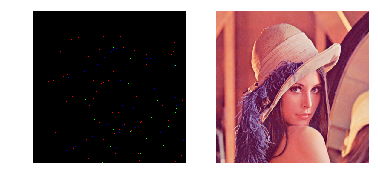

In [9]:
 %matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from __future__ import division, print_function
from pylab import *
#from scipy.misc import face
 
def fsdith(image):
    """Floyd-Steinberg dithering. Binarizes input image using FS
   algorithm. Doesnt destroy original image!
   Input:
       -image: input image
   Output:
       -imd: binarized image
   """
    imd = float32(copy(image))/255 #Copying image and normalizing
    lim = shape(image)
    for i in range(lim[0]):
        for j in range(lim[1]):
            oldpix = imd[i,j]
            newpix = uint8(oldpix+0.5) #Binarization
            error = float32(oldpix-newpix)
            imd[i,j] = newpix
           
            if (j<lim[1]-1):
                imd[i,j+1] += error*7/16
            if (i<lim[0]-1):
                imd[i+1,j] += error*5/16
            if (i<lim[0]-1) and (j<lim[1]-1):
                imd[i+1,j+1] += error/16
            if (j>0) and (i<lim[0]-1):
                imd[i+1,j-1] += error*3/16
    return imd
 
if __name__ == "__main__":
    #img = lena()
    img = plt.imread("zas_notebook/lenna.png")
    imd = fsdith(img)
 
    figure()
    subplot('121')
    axis('off')
    imshow(imd)
 
    subplot('122')
    axis('off')
    imshow(img)
    show()

## ASCII Art Generation

In [13]:
from PIL import Image
ASCII_CHARS = [ '#', '?', '%', '.', 'S', '+', '.', '*', ':', ',', '@']

def scale_image(image, new_width=100):
    """Resizes an image preserving the aspect ratio.
    """
    (original_width, original_height) = image.size
    aspect_ratio = original_height/float(original_width)
    new_height = int(aspect_ratio * new_width)

    new_image = image.resize((new_width, new_height))
    return new_image

def convert_to_grayscale(image):
    return image.convert('L')

def map_pixels_to_ascii_chars(image, range_width=25):
    """Maps each pixel to an ascii char based on the range
    in which it lies.

    0-255 is divided into 11 ranges of 25 pixels each.
    """

    pixels_in_image = list(image.getdata())
    pixels_to_chars = [ASCII_CHARS[int(pixel_value/range_width)] for pixel_value in
            pixels_in_image]

    return "".join(pixels_to_chars)

def convert_image_to_ascii(image, new_width=100):
    image = scale_image(image)
    image = convert_to_grayscale(image)

    pixels_to_chars = map_pixels_to_ascii_chars(image)
    len_pixels_to_chars = len(pixels_to_chars)

    image_ascii = [pixels_to_chars[index: index + new_width] for index in
            range(0, len_pixels_to_chars, new_width)]

    return "\n".join(image_ascii)

def handle_image_conversion(image_filepath):
    image = None
    try:
        image = Image.open(image_filepath)
    except Exception as e:
        print("Unable to open image file {}.".format(image_filepath))
        print(e)
        return

    image_ascii = convert_image_to_ascii(image)
    print(image_ascii)

if __name__=='__main__':
    import sys

    image_file_path = "zas_notebook/lenna.png"
    handle_image_conversion(image_file_path)

............S.SSSSSSSSSS+++++++++++++++++++++++++++++++++++SSSS++..+...........:::.SSSSSSSSS+S+SSS+.
...........+S..S.SSSSSS+S+++++++++++++++++++++++++++++++++++SS.S+..............:::*.SSSSSSSSS++S++S%
...........+S..SSSSSSSSSS+++++++++++++++++++++++++++++++S++SSSSS+...............:::+SSSSSSSSSSSS+S%?
...........+S.SSSSSSSSS++++++++++++++++++++++++++++++++++++++SSSS+.............+*:::.SSSS+S+S+++.???
...........+S.SSSSSSSSSS++++++++++++++++++++++++++++++++++++SSSSS+..............+:::*SSSSSSS+++.????
...........+S..SSS.SSSSSSS++++S++++++++S+SS+SS++++++++++++++SSSSS+..............+*:::+SSSSS+++.????%
...........+S..SSSSSSSSS+++++++++++++++SSSS++S+++++++++S+++S+SSSS++.............++::::SSSS+S+.?%?%?%
...........+...S.SSSSSSSSS++SS++++++++++SSS+SSS++++++++SS+S+SSSSS+++...........+++.:::.SSS++.???%%%?
...........+...SSSS.SSSSSSS+S+++++++++++++SSSSSSS++S+++++SS++SSSS+++...........++++::::.SS+.???%?%??
.....++....+S..SSSSSSSSS+S+S+++++++++++S.+..***.+SSS++++++++SSSSSS+++.........+++++.:::+SS.

In [14]:
# Calc Encoder Resolution
pulse_per_rev = 53718 # Pulses per revelation
circumference_wheel_mm = 282.6 #mm

enc_resolution = (circumference_wheel_mm*1000)/pulse_per_rev

print("Pulse Per Revelation = {} Pulses".format(pulse_per_rev))
print("Circumference Wheel  = {} mm = {}um".format(circumference_wheel_mm, circumference_wheel_mm*1000))
print("Encoder Resolution   = {} um/pulse /4={} um/pulse".format(enc_resolution, enc_resolution/4))

Pulse Per Revelation = 53718 Pulses
Circumference Wheel  = 282.6 mm = 282600.0um
Encoder Resolution   = 5.2608064335976765 um/pulse /4=1.3152016083994191 um/pulse


In [15]:
# Calc Encoder Pulses Setting
enc_resolution = 2.012 # um / pulse
circumference_wheel_mm = 282.6 #mm
pulse_per_rev = (circumference_wheel_mm*1000)/enc_resolution

print("Encoder Resolution   = {} um/pulse".format(enc_resolution))
print("Circumference Wheel  = {} mm = {}um".format(circumference_wheel_mm, circumference_wheel_mm*1000))
print("Pulse Per Revelation = {} Pulses /4={} Pulses".format(pulse_per_rev, pulse_per_rev/4))

Encoder Resolution   = 2.012 um/pulse
Circumference Wheel  = 282.6 mm = 282600.0um
Pulse Per Revelation = 140457.2564612326 Pulses /4=35114.31411530815 Pulses
